In [9]:
import pandas as pd
import os
import numpy as np
from sklearn.neighbors import KernelDensity


In [2]:
# Read in the combined stats file
dirname = os.path.abspath('..')
filename_pkl = dirname + "/data/combined_stats.pkl"
df = pd.read_pickle(filename_pkl)

df.head()

,Fighter,Str,Td,Pass,Weight class,Method,Round,Time,KD,Rev.,DK_Points,Round_Cat
0,Khabib Nurmagomedov,22,7,5,Lightweight,SUB,3,2:06,0,0,106.0,3
1,Paul Felder,56,0,0,Lightweight,DEC,3,5:00,0,0,58.0,3 DEC
2,Islam Makhachev,43,0,0,Lightweight,DEC,3,5:00,1,0,61.5,3 DEC
3,Curtis Blaydes,25,5,3,Heavyweight,KO/TKO,2,2:22,0,0,116.5,2
4,Diego Ferreira,109,0,0,Lightweight,DEC,3,5:00,0,0,84.5,3 DEC


In [27]:
x = np.array(df['DK_Points']).reshape(-1,1)

In [29]:
kde = KernelDensity().fit(x)

In [48]:
aa = kde.sample(n_samples=10000)

In [49]:
np.max(aa)

191.15266619436142

In [42]:
df['DK_Points'].describe()

count    1771.000000
mean       92.214850
std        22.282965
min        38.500000
25%        74.000000
50%        94.000000
75%       107.750000
max       190.000000
Name: DK_Points, dtype: float64

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

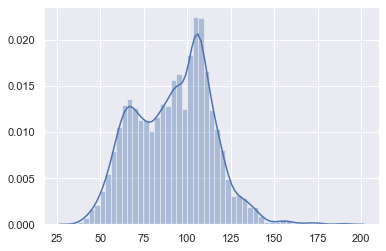

In [52]:
sns.distplot(aa)

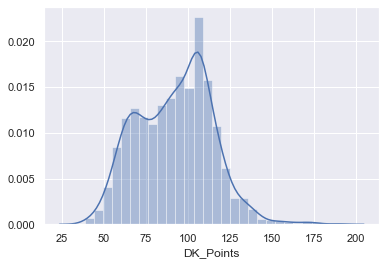

In [53]:
sns.distplot(df['DK_Points'])

## See how the kde works with smaller sample size

In [55]:
df['Weight class'].value_counts()

Welterweight             295
Lightweight              286
Featherweight            190
Middleweight             185
Bantamweight             182
Light Heavyweight        145
Heavyweight              138
Women's Strawweight      114
Flyweight                 88
Women's Bantamweight      65
Women's Flyweight         62
Women's Featherweight     11
Catch Weight              10
Name: Weight class, dtype: int64

In [58]:
x_small = np.array(df.loc[df['Weight class']=="Women's Flyweight", 'DK_Points']).reshape(-1, 1)

In [59]:
kde_small = KernelDensity().fit(x_small)

In [60]:
aa_small = kde_small.sample(n_samples=10000)

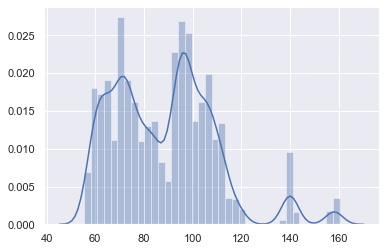

In [61]:
sns.distplot(aa_small)

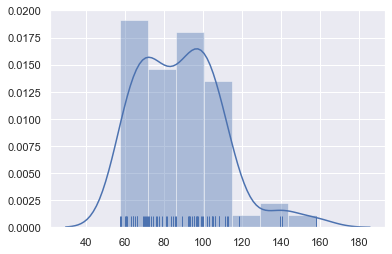

In [63]:
sns.distplot(x_small, rug=True)

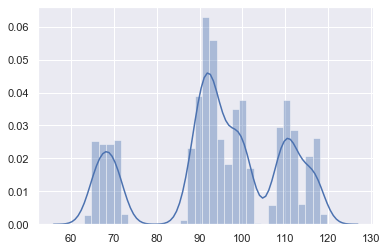

In [71]:
x_tiny = np.array(df.loc[df['Weight class']=="Women's Featherweight", 'DK_Points']).reshape(-1, 1)
kde_tiny = KernelDensity().fit(x_tiny)
aa_tiny = kde_tiny.sample(n_samples=10000)
sns.distplot(aa_tiny)

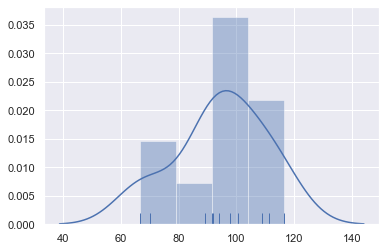

In [66]:
sns.distplot(x_tiny, rug=True)